## EXPLORACIÓN DE LOS DATOS

Nuestro objetivo es hacer el deployment de un modelo lineal que predice los precios de las viviendas. El dataset tiene 79 variables explicativas que describen casi todos los aspectos de las casas residenciales en Ames (Iowa).
El data set Ames Housing dataset fue compilado por Dean De Cock for para su uso en formación.

In [1]:
# Manejo de datos
import pandas as pd
import numpy as np

# Representación gráfica
import matplotlib.pyplot as plt

# Visualización de todas las columnas del banco de datos
pd.pandas.set_option('display.max_columns', None)

In [2]:
# ingesta de datos
data = pd.read_csv('houseprice.csv')

# visualización
print(data.shape)
data.head()

(1459, 81)


,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,169277.0525,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,187758.3940,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,183583.6836,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,179317.4775,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,150730.0800,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


**La tarea consiste en:**

1- Exploración gráfica del objetivo (nuestra variable endógena):
2- Identificar valores faltantes.
3- Identificar potenciales casos extremos (outliers) con boxplots.
4- Identificar variables numéricas:
    - Separar y analizar las variables temporales y su relación con SalesPrice.
    - Analizar la distribución y relación con SalesPrice de las variables contínuas.
5- Identificar variables discretas/categóricas:
    - Relación con la variables SalesPrice.
    - Cardinalidad.
    - Categorías poco frecuentes.

### Datos faltantes

In [3]:
# Lista de variables que contienen datos faltantes
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# Porcentaje de datos faltantes en cada variable.
data[vars_with_na].isnull().mean()

MSZoning        0.002742
LotFrontage     0.155586
Alley           0.926662
Utilities       0.001371
Exterior1st     0.000685
Exterior2nd     0.000685
MasVnrType      0.010966
MasVnrArea      0.010281
BsmtQual        0.030158
BsmtCond        0.030843
BsmtExposure    0.030158
BsmtFinType1    0.028787
BsmtFinSF1      0.000685
BsmtFinType2    0.028787
BsmtFinSF2      0.000685
BsmtUnfSF       0.000685
TotalBsmtSF     0.000685
BsmtFullBath    0.001371
BsmtHalfBath    0.001371
KitchenQual     0.000685
Functional      0.001371
FireplaceQu     0.500343
GarageType      0.052090
GarageYrBlt     0.053461
GarageFinish    0.053461
GarageCars      0.000685
GarageArea      0.000685
GarageQual      0.053461
GarageCond      0.053461
PoolQC          0.997944
Fence           0.801234
MiscFeature     0.965045
SaleType        0.000685
dtype: float64

#### Relación entre datos faltantes y Sale Price

Impacto potencial de los datos faltantes sobre la predicción del target.

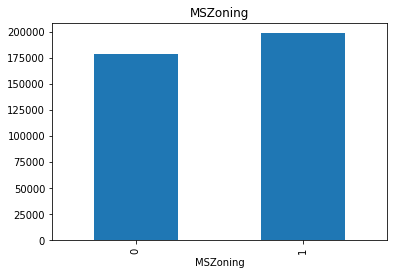

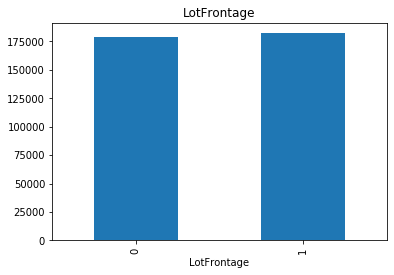

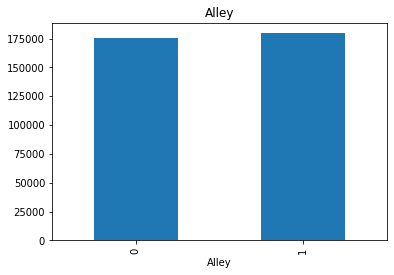

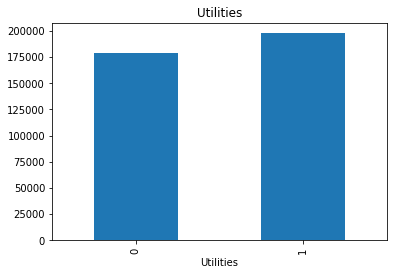

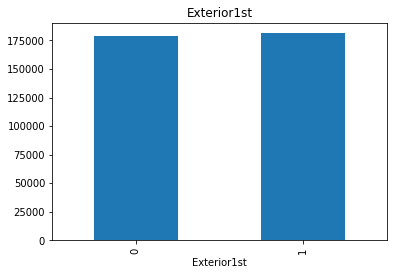

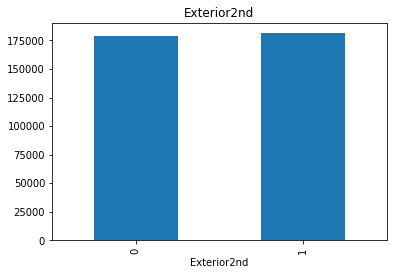

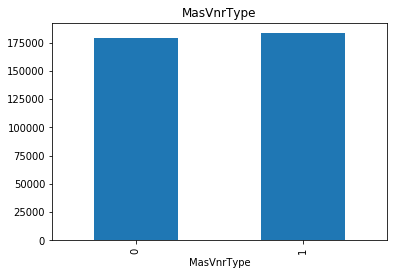

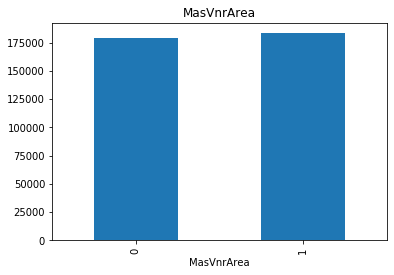

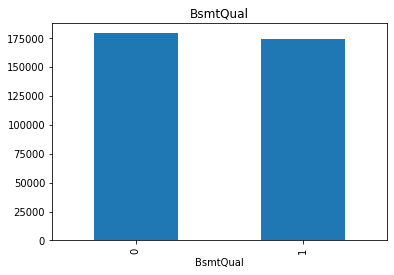

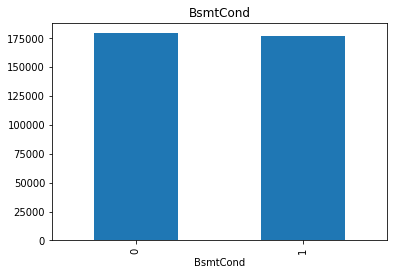

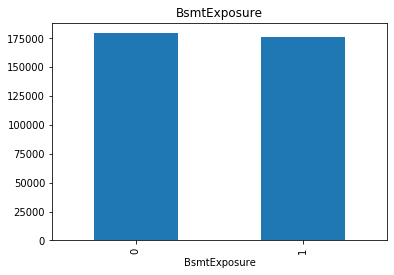

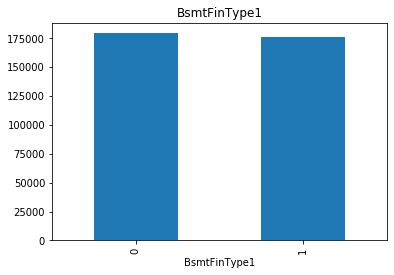

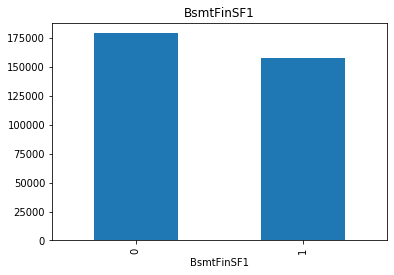

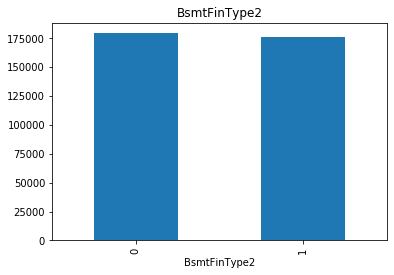

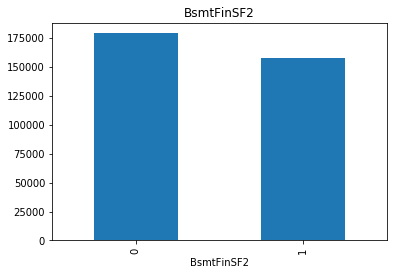

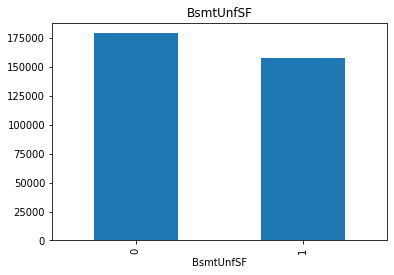

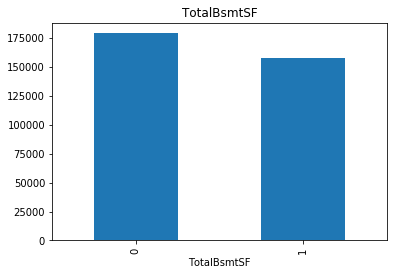

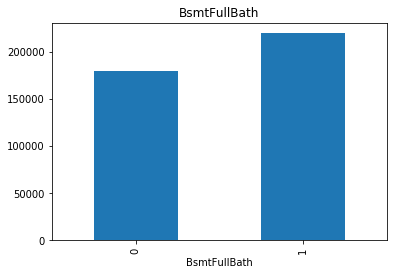

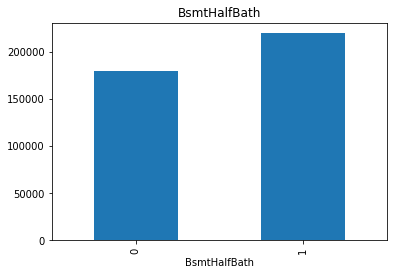

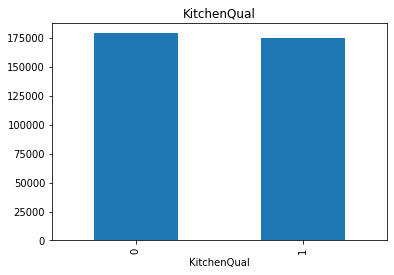

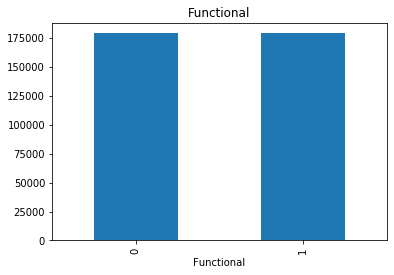

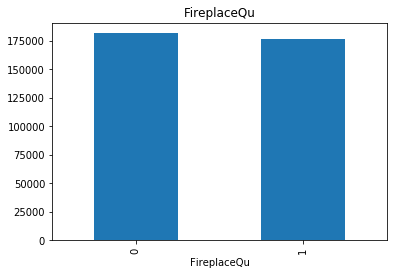

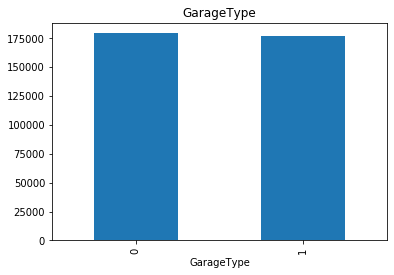

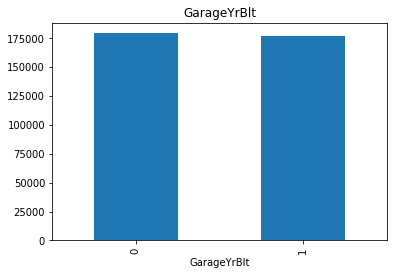

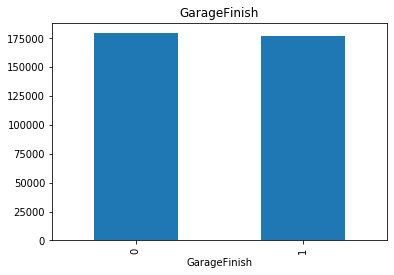

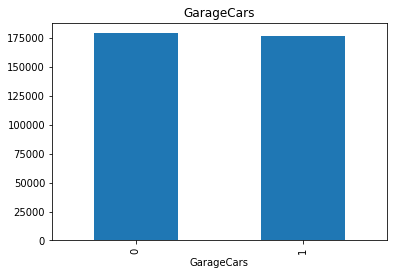

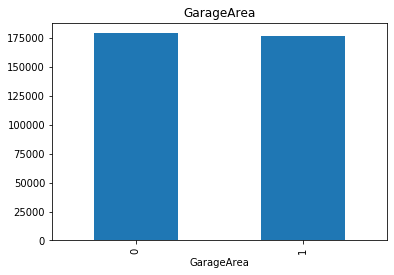

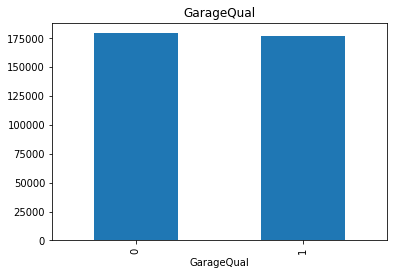

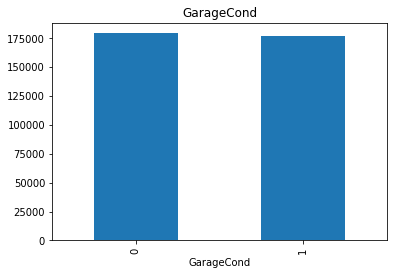

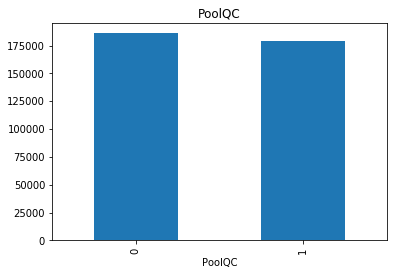

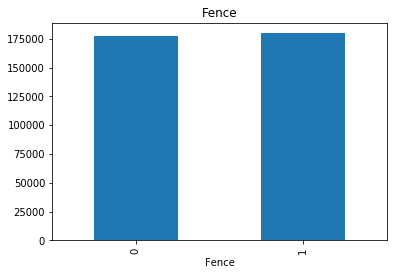

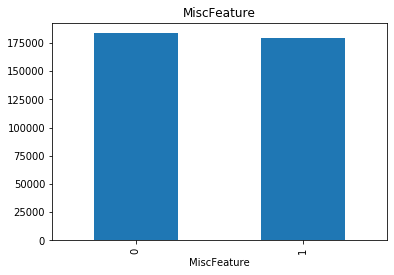

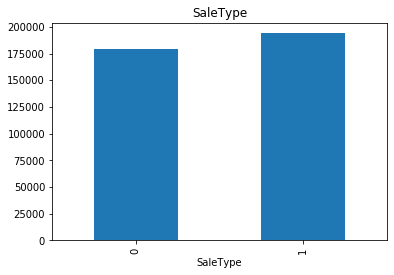

In [4]:
def analyse_na_value(df, var):

    df = df.copy()

    # Variable dicotómica; 1= missing.
    df[var] = np.where(df[var].isnull(), 1, 0)

    # comparación de ma ledia del precio de venta entre los casos faltantes y no faltantes.
    df.groupby(var)['SalePrice'].median().plot.bar()

    plt.title(var)
    plt.show()


# ejecutamos la función en todas las variables que tienen datos faltantes.
for var in vars_with_na:
    
    analyse_na_value(data, var)

### Variables numéricas

In [6]:
# make list of numerical variables
num_vars = [var for var in data.columns if data[var].dtypes != 'O']

print('Número de variables numéricas: ', len(num_vars))

# Visualización
data[num_vars].head()

Número de variables numéricas:  38


,Id,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,169277.0525,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010
1,1462,187758.3940,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,183583.6836,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010
3,1464,179317.4775,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,2010
4,1465,150730.0800,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,1,2010


In [7]:
# Comprobamos que la variable ID es el identificador de caso para descartarla.
print('Número de etiquetas en el ID: ', len(data.Id.unique()))
print('Número de casas: ', len(data))

Número de etiquetas en el ID:  1459
Número de casas:  1459


#### Variables temporales

Vamos a pasarlas a intervalos de tiempo: número de años respecto al año de venta.

In [8]:
# Variables que tienen información de años

year_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]

year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [8]:
# Visualización

for var in year_vars:
    print(var, data[var].unique())
    print()

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 200

Text(0.5, 1.0, 'Evolución del precio')

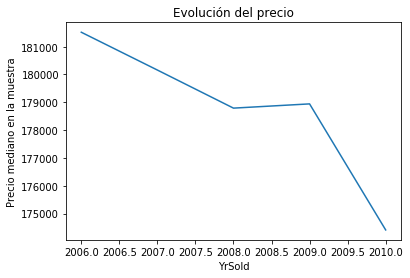

In [9]:
data.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Precio mediano en la muestra')
plt.title('Evolución del precio')

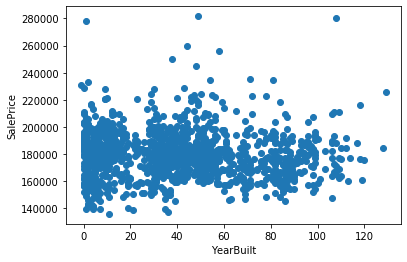

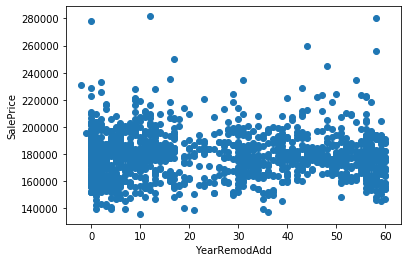

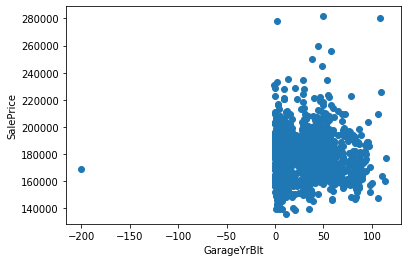

In [10]:
# Relación entre las variables año y el target:

def analyse_year_vars(df, var):
    df = df.copy()
    
    # Número de años respecto del año de venta.
    df[var] = df['YrSold'] - df[var]
    
    #gráficos
    plt.scatter(df[var], df['SalePrice'])
    plt.ylabel('SalePrice')
    plt.xlabel(var)
    plt.show()
    
    
for var in year_vars:
    if var !='YrSold':
        analyse_year_vars(data, var)
    

<i>Nota para la próxima versión del ejercicio</i>: hay un dato faltante en los años que introduce un valor extremo en la variable.

#### Variables discretas

In [11]:
#  Listado de variables discretas
discrete_vars = [var for var in num_vars if len(
    data[var].unique()) < 20 and var not in year_vars+['Id']]


print('Número de variables discretas: ', len(discrete_vars))

Número de variables discretas:  16


In [12]:
# Visualización

data[discrete_vars].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MoSold
0,20,5,6,0,0.0,0.0,1,0,2,1,5,0,1.0,0,0,6
1,20,6,6,0,0.0,0.0,1,1,3,1,6,0,1.0,0,0,6
2,60,5,5,0,0.0,0.0,2,1,3,1,6,1,2.0,0,0,3
3,60,6,6,0,0.0,0.0,2,1,3,1,7,1,2.0,0,0,6
4,120,8,5,0,0.0,0.0,2,0,2,1,5,0,2.0,0,0,1


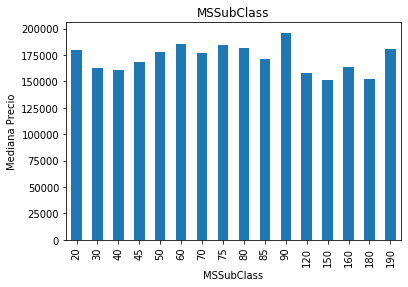

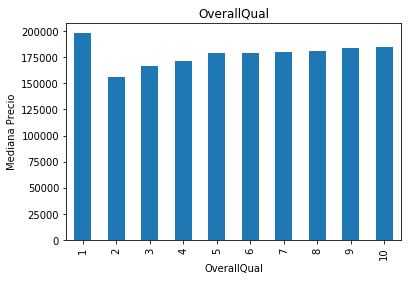

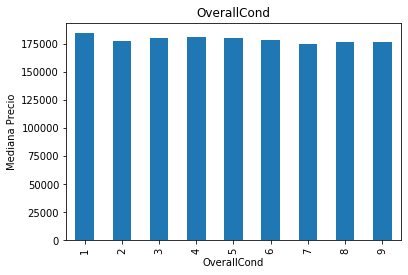

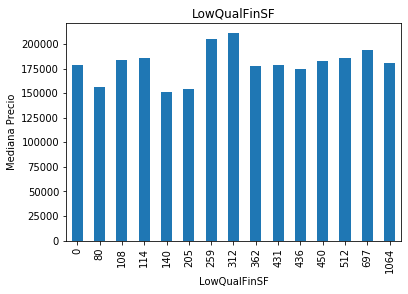

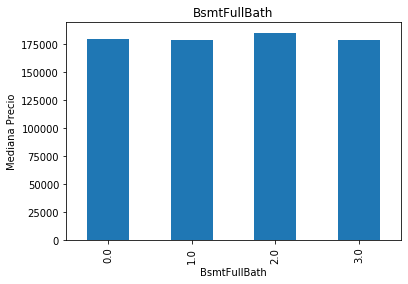

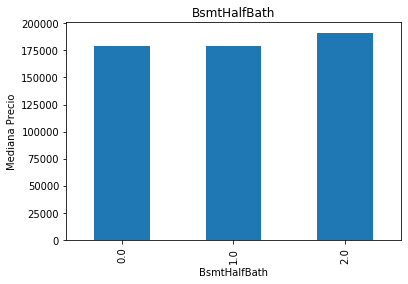

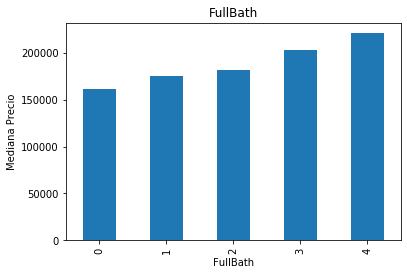

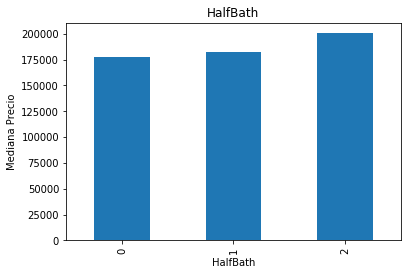

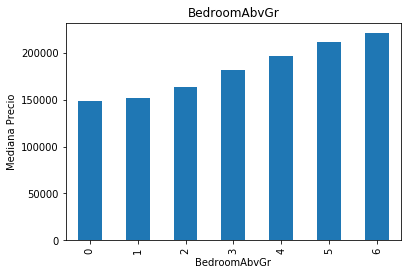

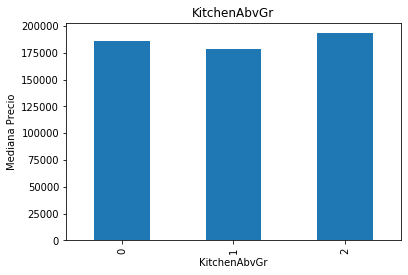

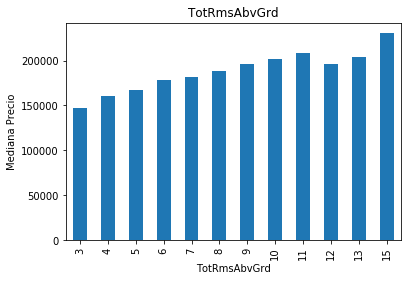

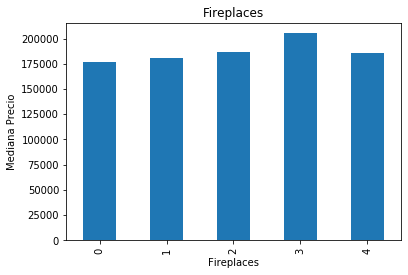

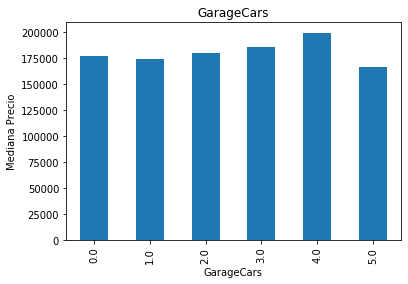

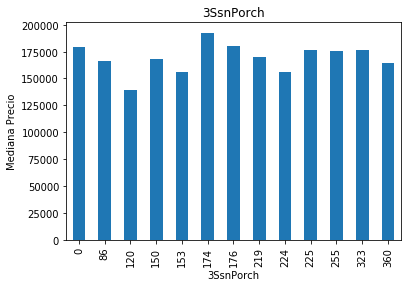

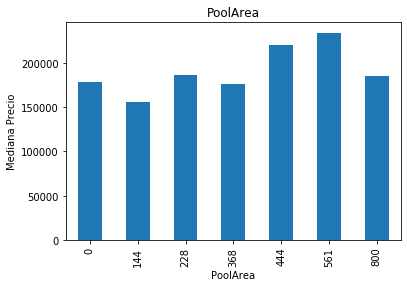

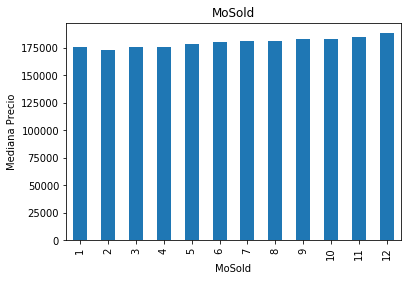

In [13]:
def analyse_discrete(df, var):
    df = df.copy()
    df.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.ylabel('Mediana Precio')
    plt.show()
    
for var in discrete_vars:
    analyse_discrete(data, var)

#### Variables continuas

In [15]:
# Listado de variables continuas
cont_vars = [
    var for var in num_vars if var not in discrete_vars+year_vars+['Id']]

print('Número de variables continuas: ', len(cont_vars))

Número de variables continuas:  17


In [16]:
# Visualización

data[cont_vars].head()

,SalePrice,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal
0,169277.0525,80.0,11622,0.0,468.0,144.0,270.0,882.0,896,0,896,730.0,140,0,0,120,0
1,187758.3940,81.0,14267,108.0,923.0,0.0,406.0,1329.0,1329,0,1329,312.0,393,36,0,0,12500
2,183583.6836,74.0,13830,0.0,791.0,0.0,137.0,928.0,928,701,1629,482.0,212,34,0,0,0
3,179317.4775,78.0,9978,20.0,602.0,0.0,324.0,926.0,926,678,1604,470.0,360,36,0,0,0
4,150730.0800,43.0,5005,0.0,263.0,0.0,1017.0,1280.0,1280,0,1280,506.0,0,82,0,144,0


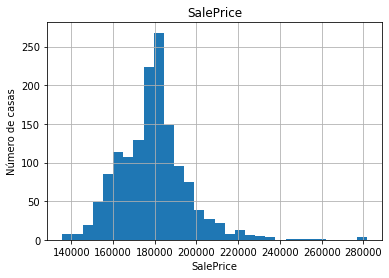

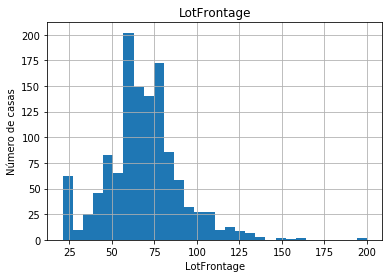

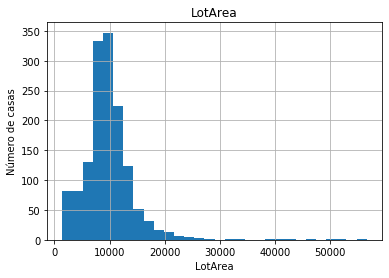

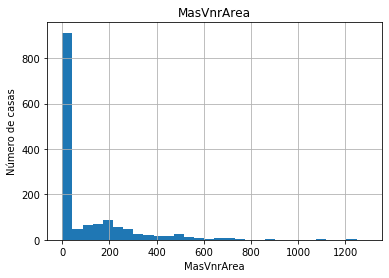

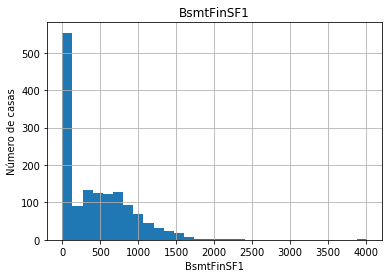

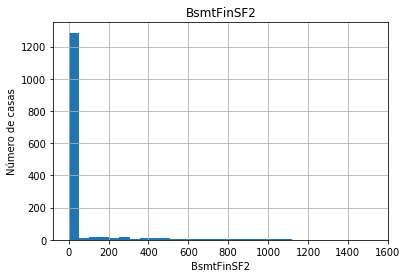

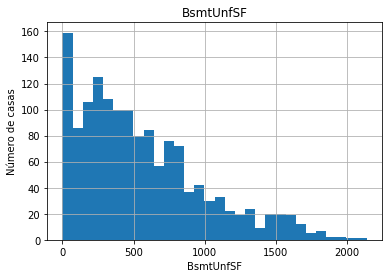

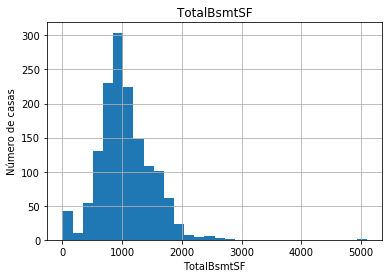

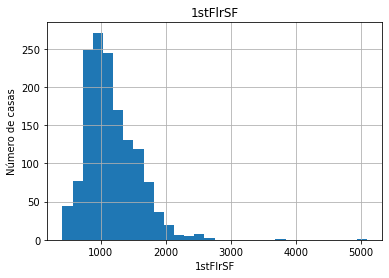

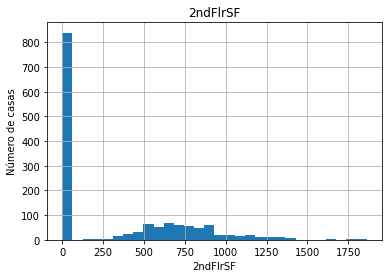

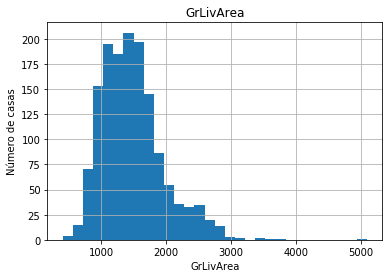

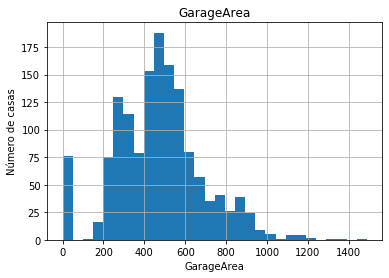

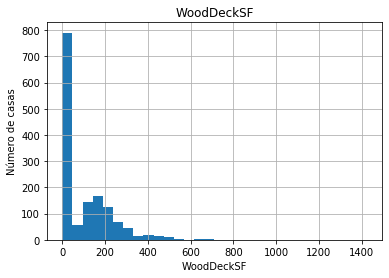

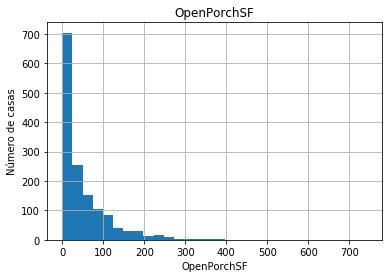

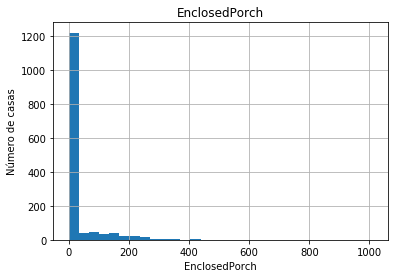

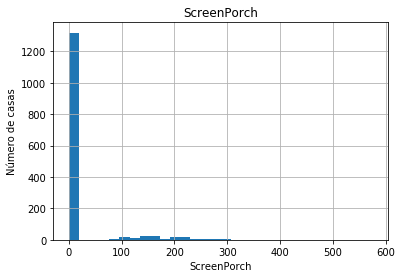

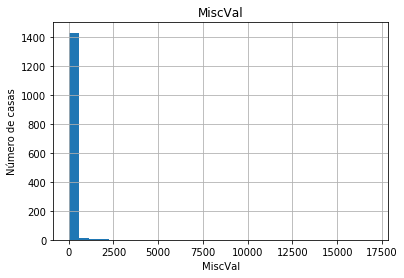

In [17]:
# Distribución


def analyse_continuous(df, var):
    df = df.copy()
    df[var].hist(bins=30)
    plt.ylabel('Número de casas')
    plt.xlabel(var)
    plt.title(var)
    plt.show()


for var in cont_vars:
    analyse_continuous(data, var)

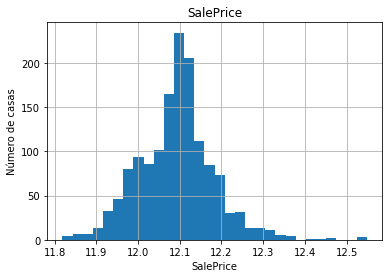

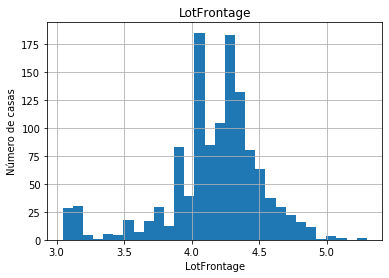

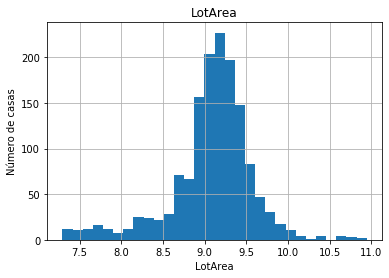

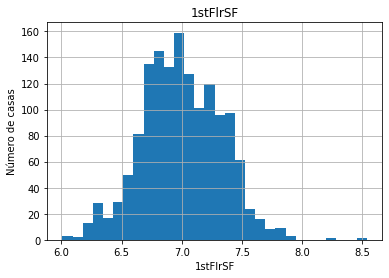

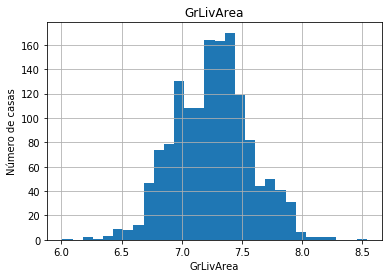

In [18]:
# Aplicación de transformación logarítmica y revisión de la distribución.


def analyse_transformed_continuous(df, var):
    df = df.copy()

    # el logaritmo de un negativo o de 0 no existe. Hay que tenerlo en cuenta.
    if any(data[var] <= 0):
        pass
    else:
        # transformación logarítmica.
        df[var] = np.log(df[var])
        df[var].hist(bins=30)
        plt.ylabel('Número de casas')
        plt.xlabel(var)
        plt.title(var)
        plt.show()


for var in cont_vars:
    analyse_transformed_continuous(data, var)

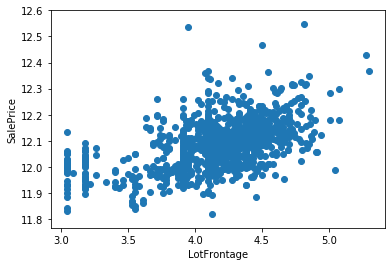

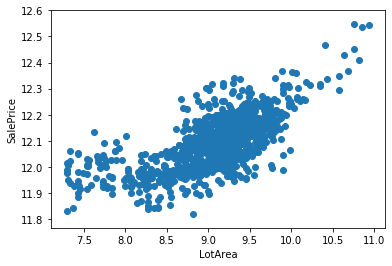

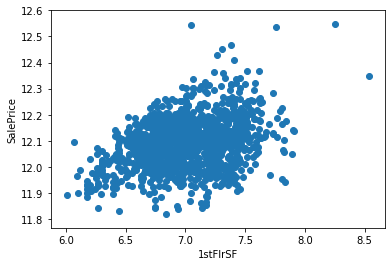

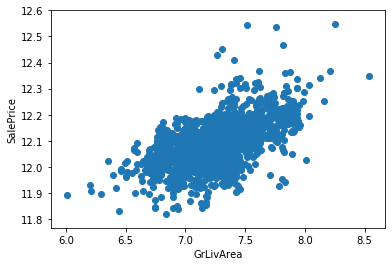

In [19]:
# Relación entre el precio de la vivienda y las variables transformadas


def transform_analyse_continuous(df, var):
    df = df.copy()

    
    if any(data[var] <= 0):
        pass
    else:
        # transformación logarítmica
        df[var] = np.log(df[var])
        
        # transformación del target
        df['SalePrice'] = np.log(df['SalePrice'])
        
        # plot
        plt.scatter(df[var], df['SalePrice'])
        plt.ylabel('SalePrice')
        plt.xlabel(var)
        plt.show()


for var in cont_vars:
    if var != 'SalePrice':
        transform_analyse_continuous(data, var)

#### Valores extremos (Outliers)

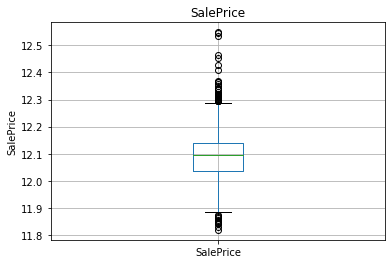

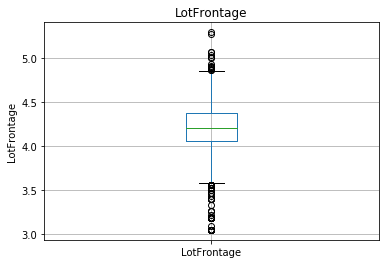

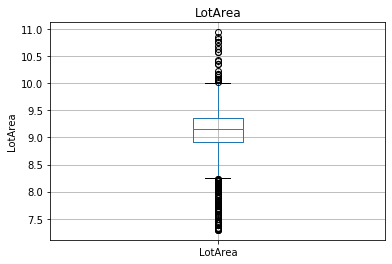

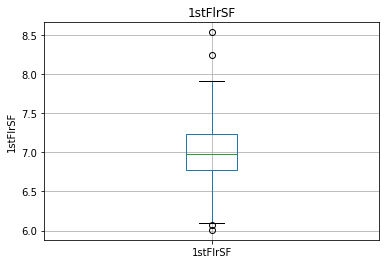

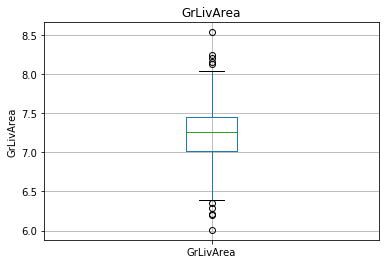

In [20]:
# Usamos boxplots.


def find_outliers(df, var):
    df = df.copy()

    
    if any(data[var] <= 0):
        pass
    else:
        df[var] = np.log(df[var])
        df.boxplot(column=var)
        plt.title(var)
        plt.ylabel(var)
        plt.show()


for var in cont_vars:
    find_outliers(data, var)

### Variables categóricas

In [21]:
# Lista de variables categóricas
cat_vars = [var for var in data.columns if data[var].dtypes == 'O']

print('Número de variables categóricas: ', len(cat_vars))

Número de variables categóricas:  43


In [22]:
# Visualización
data[cat_vars].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,None,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


#### Cardinalidad: número de categorías (etiquetas)

In [22]:
data[cat_vars].nunique()

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

#### Categorías poco frecuentes:

In [23]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    # determina el porcentaje de observaciones por categoría
    tmp = df.groupby(var)['SalePrice'].count() / len(df)

    # devuelve las categorías que son raras.
    return tmp[tmp < rare_perc]

# Aplicando la función anterior, mostrar las categorías que son inferiores al 1%

for var in cat_vars:
    print(analyse_rare_labels(data, var, 0.01))
    print()

MSZoning
RH    0.006854
Name: SalePrice, dtype: float64

Street
Grvl    0.004112
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

LotShape
IR3    0.004112
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

Series([], Name: SalePrice, dtype: float64)

LotConfig
FR3    0.006854
Name: SalePrice, dtype: float64

LandSlope
Sev    0.002056
Name: SalePrice, dtype: float64

Neighborhood
Blmngtn    0.007539
Blueste    0.005483
BrDale     0.009596
NPkVill    0.009596
Veenker    0.008910
Name: SalePrice, dtype: float64

Condition1
PosA    0.008225
RRNe    0.002742
RRNn    0.002742
Name: SalePrice, dtype: float64

Condition2
Artery    0.002056
Feedr     0.004798
PosA      0.002056
PosN      0.001371
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

HouseStyle
1.5Unf    0.003427
2.5Unf    0.008910
Name: SalePrice, dtype: float64

RoofStyle
Flat       0.004798
Gambrel    0.007539
Mansard    0.002742
Shed       0.0020

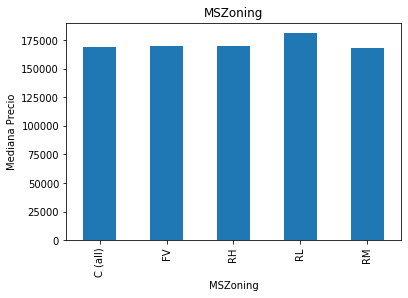

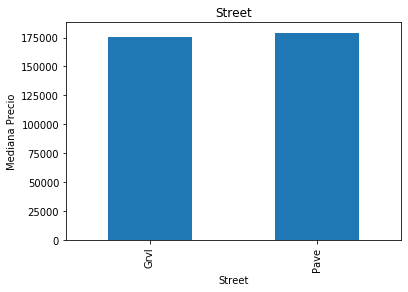

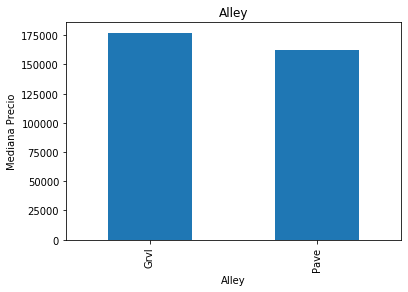

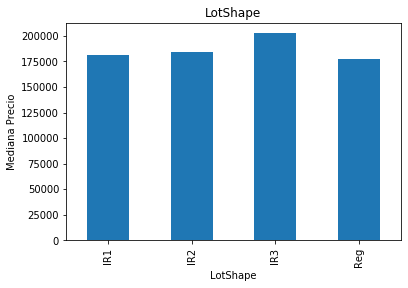

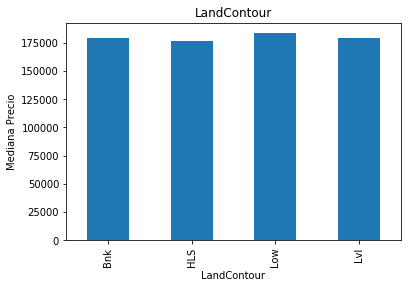

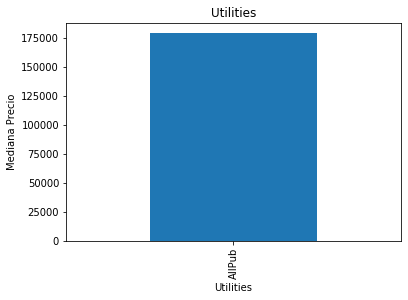

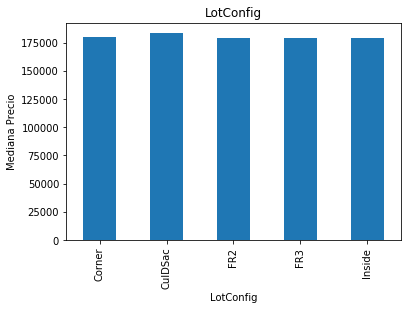

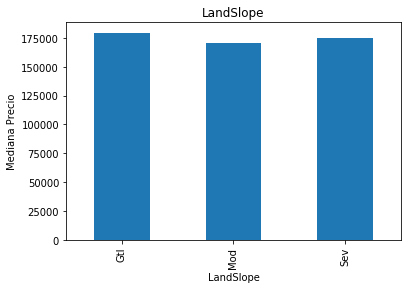

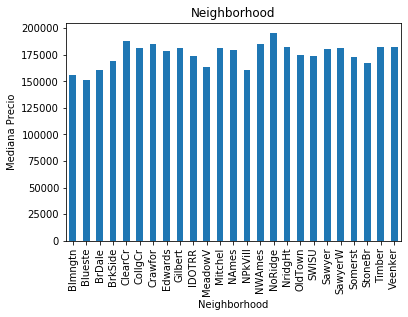

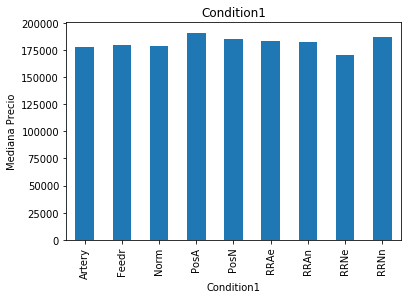

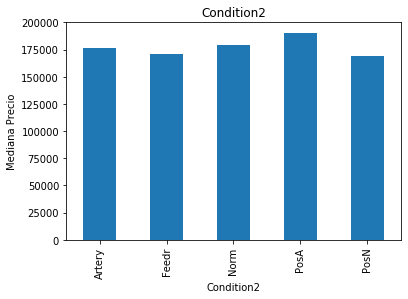

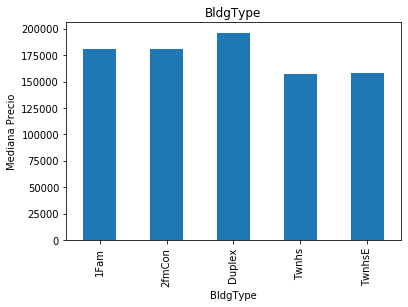

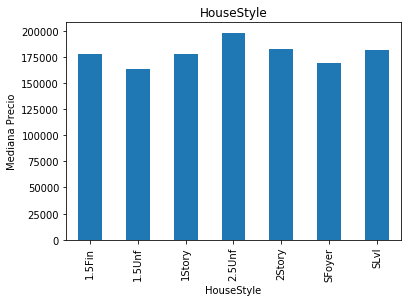

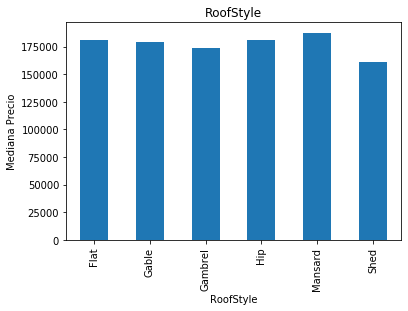

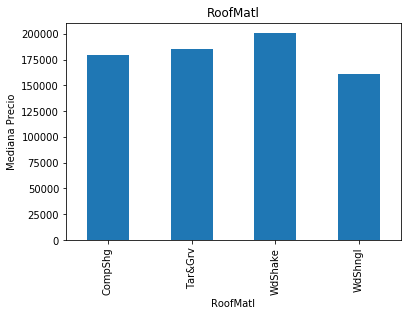

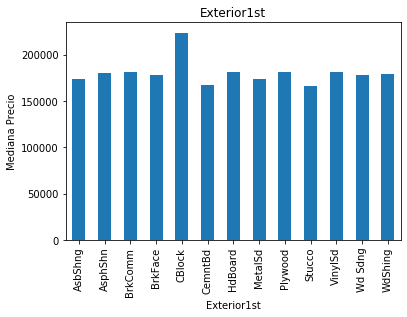

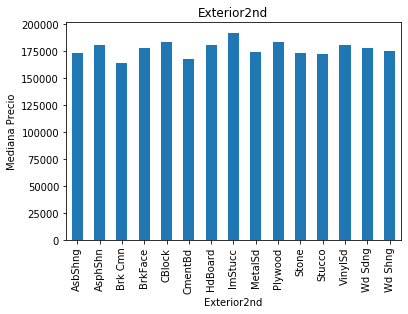

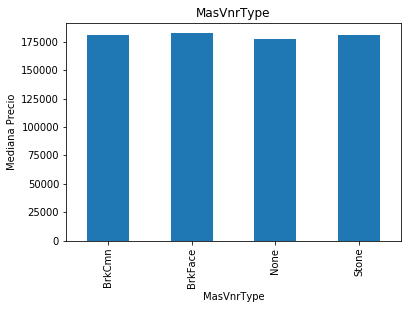

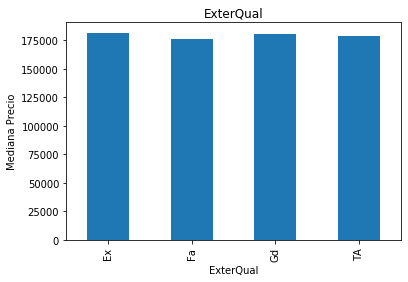

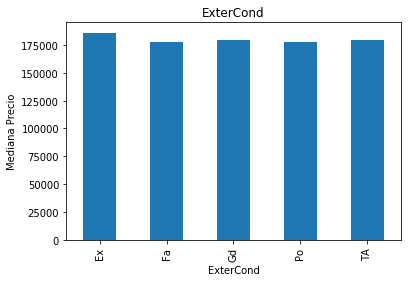

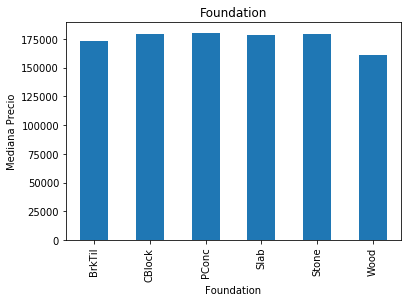

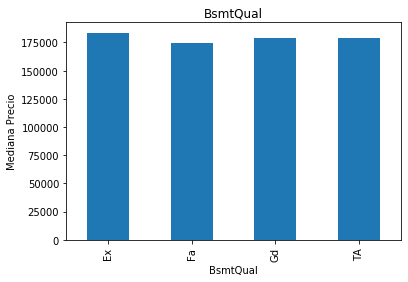

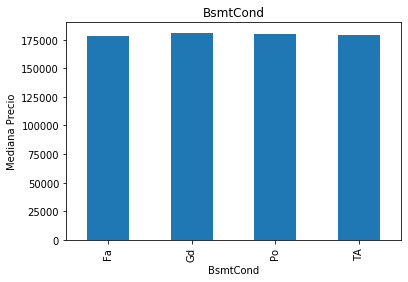

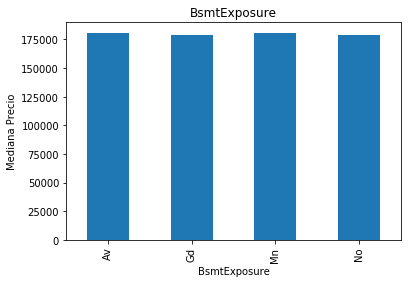

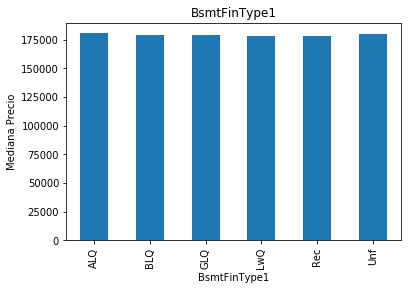

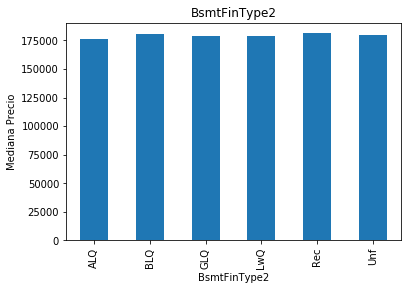

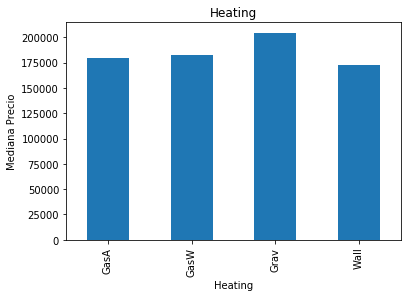

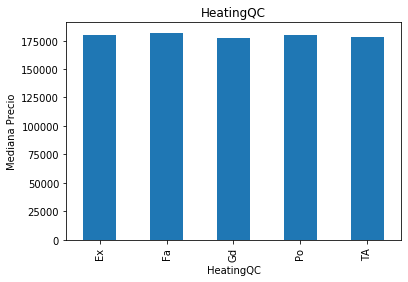

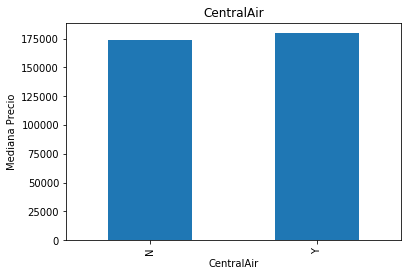

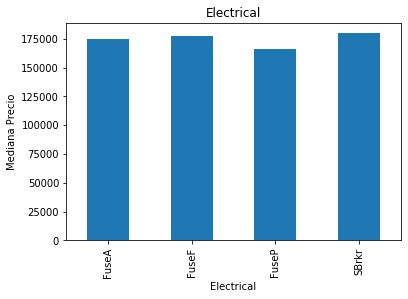

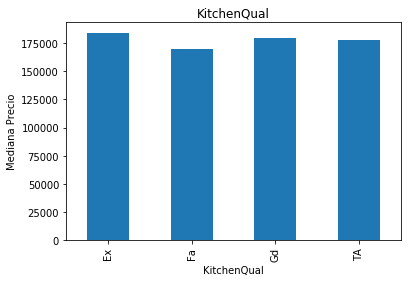

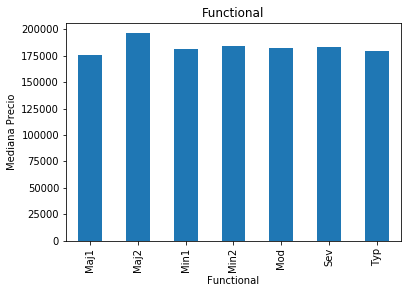

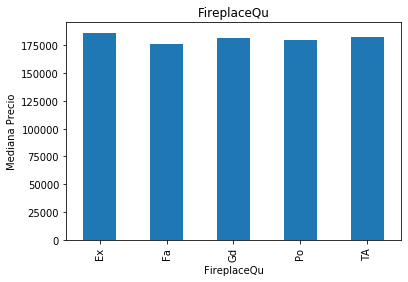

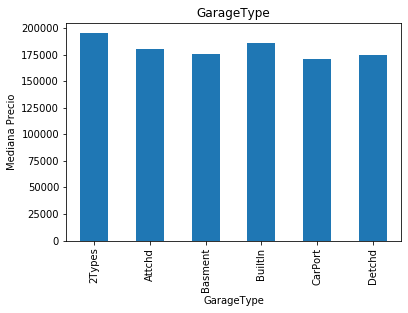

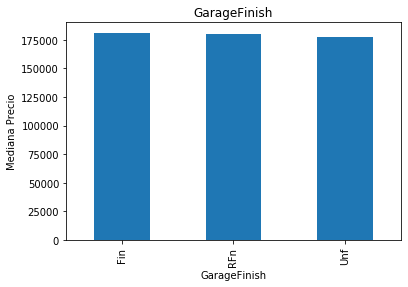

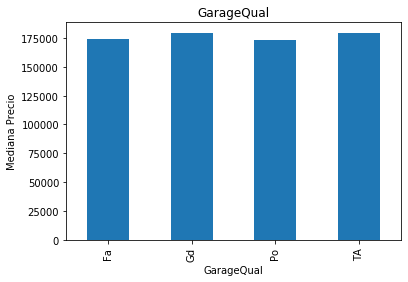

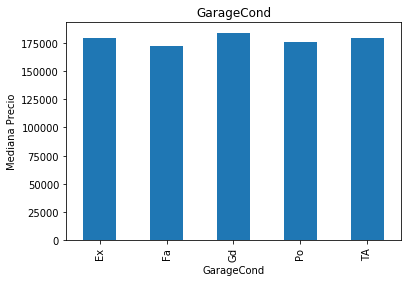

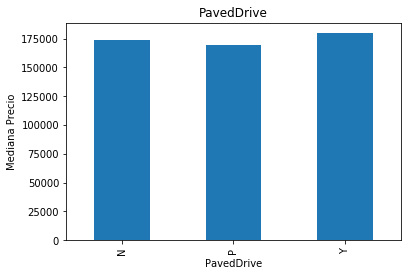

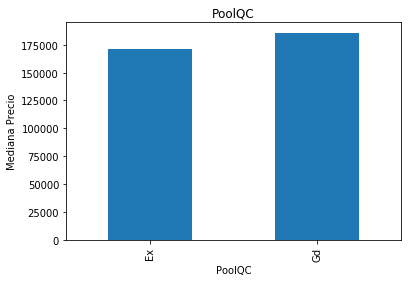

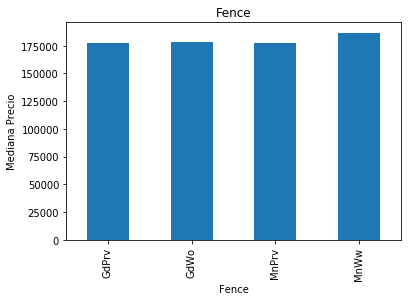

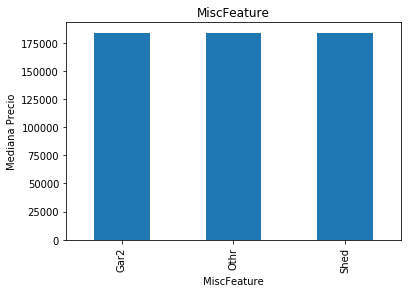

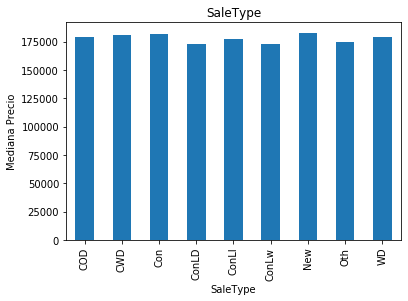

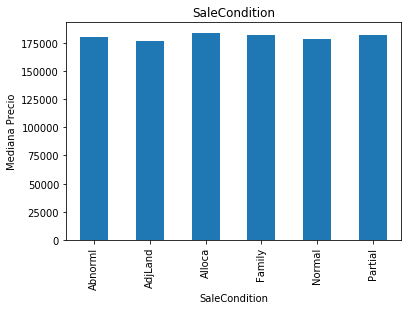

In [24]:
for var in cat_vars:
    # Usando la función para las variables discretas...

    analyse_discrete(data, var)